## Atividade 2
### Nome: Letícia Saraiva Chaves, 402120

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import numpy as np
import matplotlib.pyplot as plt

### Importe o dataset 

In [3]:
mnist = datasets.load_digits()

### Divida o conjunto de dados em treino (treino e validação) e teste. Para isso utilize o módulo train_test_split do scikit learn 


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.25, random_state=42)

In [6]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [7]:
print("Training data points: {}".format(len(trainLabels)))
print("Testing data points: {}".format(len(testLabels)))

Training data points: 1212
Testing data points: 450


### Inicialize os valores de k para o classificador KNN juntamente com uma lista para armazenar os valores da acurácia

In [8]:
kVals = range(1, 30, 2)
accuracies = []

### Utilize o KNeighborsClassifier do scikit learn para criar o seu classificador
https://scikit-learn.org/stable/modules/neighbors.html

In [9]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(trainData, trainLabels)
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=99.26%
k=3, accuracy=99.26%
k=5, accuracy=99.26%
k=7, accuracy=99.26%
k=9, accuracy=99.26%
k=11, accuracy=99.26%
k=13, accuracy=99.26%
k=15, accuracy=99.26%
k=17, accuracy=98.52%
k=19, accuracy=98.52%
k=21, accuracy=97.78%
k=23, accuracy=97.04%
k=25, accuracy=97.78%
k=27, accuracy=97.04%
k=29, accuracy=97.04%


### Imprima em um gráfico os valores da acurácia em função de k

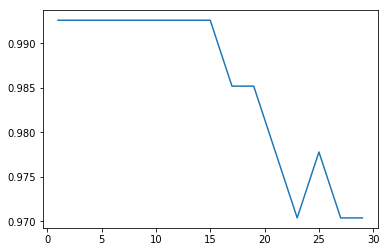

In [10]:
%matplotlib inline

plt.plot(kVals, accuracies)
plt.show()

### Avaliação : Escolha o k com a melhor acurácia e avalie  o modelo utilizado as métricas de classificação disponíveis no scikit learn

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

* confusion_matrix
* accuracy_score
* f1_score
* etc

In [12]:
#Treinando apenas para k=3
model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
model.fit(trainData, trainLabels)

y_ = model.predict(testData)


Matriz de confusão serve para avaliar a precisão de uma classificação.

In [13]:
confusion_matrix(testLabels, y_)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  1, 44]])

A acurácia é uma pontuação de classificação de precisão.

In [15]:
print("Accuracy with metric euclidean: ", accuracy_score(testLabels, y_))

Accuracy with metric euclidean:  0.9866666666666667


O F1_score pode ser interpretado como uma média ponderada da precision e do recall, em que um F1_score alcança seu melhor valor em 1 e o pior escore em 0. 

In [16]:
print("F1_score with metric euclidean: ", f1_score(testLabels, y_, average='weighted'))

F1_score with metric euclidean:  0.9865198471002955


Calcular o recall. O recall é a relação onde está o número de positivos verdadeiros e o número de falsos negativos.

In [17]:
print("Recall_score with metric euclidean: ", recall_score(testLabels, y_, average='weighted'))

Recall_score with metric euclidean:  0.9866666666666667


Calcular a precisão. A precisão é a relação onde está o número de positivos verdadeiros e o número de falsos positivos.

In [18]:
print("Precision_score with metric euclidean: ", precision_score(testLabels, y_, average='weighted'))

Precision_score with metric euclidean:  0.9867009989512789


### Modifique o parâmetro metric do classficiador e avalie outras distâncias métricas disponíveis

Distância de Minkowski

In [19]:
#Treinando apenas para k=3
model = KNeighborsClassifier(n_neighbors=3, metric='minkowski')
model.fit(trainData, trainLabels)

y_ = model.predict(testData)


In [46]:
confusion_matrix(testLabels, y_)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 37,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  1, 44]])

In [20]:
print("Accuracy with metric minkowski: ", accuracy_score(testLabels, y_))

Accuracy with metric minkowski:  0.9866666666666667


In [21]:
print("Precision_score with metric minkowski: ", precision_score(testLabels, y_, average='weighted'))

Precision_score with metric minkowski:  0.9867009989512789


Distância de Manhattan

In [22]:
#Treinando apenas para k=3
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(trainData, trainLabels)

y_ = model.predict(testData)

In [23]:
confusion_matrix(testLabels, y_)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 55,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 57,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  1],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  1, 44]])

In [24]:
print("Accuracy with metric manhattan: ", accuracy_score(testLabels, y_))

Accuracy with metric manhattan:  0.9777777777777777


In [25]:
print("Precision_score with metric manhattan: ", precision_score(testLabels, y_, average='weighted'))

Precision_score with metric manhattan:  0.9778373561100018
